**Dependencies**

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error #just for checking errors

# 7.1

**Load data**

In [2]:
first_dataset = np.loadtxt("Datasets/FirstDataset.txt")
print(first_dataset.shape)

(320, 2)


In [3]:
x = first_dataset[:, 0].reshape(320, 1)
y = first_dataset[:, 1].reshape(320, 1)

## Closed Form

In [4]:
x_extended = np.hstack((np.ones((len(x), 1)), x))
w_opt = np.linalg.inv((x_extended.T.dot(x_extended))).dot(x_extended.T).dot(y)
w_opt

array([[-3.12460718],
       [ 0.83550241]])

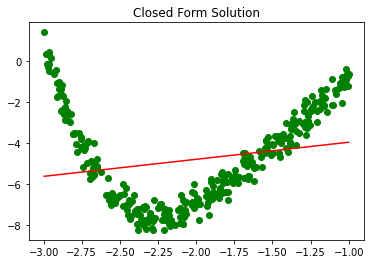

In [5]:
pred_y = w_opt[1] * x + w_opt[0]
plt.scatter(x, y, c='green')
plt.plot(x, pred_y, c= "red")
plt.title("Closed Form Solution")
plt.show()

## Gradient Descent

In [6]:
def compute_error(x, y, w0, w1):
  return y - w1 * x - w0

def cost_function(x, y, w0, w1):
  return compute_error(x, y, w0, w1).mean()

def compute_w0_grad(x, y, w0, w1):
  return -2 * compute_error(x, y, w0, w1).mean()

def compute_w1_grad(x, y, w0, w1):
  return -2 * (x * compute_error(x, y, w0, w1)).mean()

In [7]:
w0 = np.random.randn(1)
w1 = np.random.randn(1)
print("Initial w0:", w0)
print("Initial w1:", w1)

alpha = 1e-1
n_iterations = 1000

for iter in range(n_iterations):
  w0 = w0 - alpha * compute_w0_grad(x, y, w0, w1)
  w1 = w1 - alpha * compute_w1_grad(x, y, w0, w1)

print("Final w0: ", w0)
print("Final w1: ", w1)
predicted_y = w1 * x + w0

Initial w0: [0.52938865]
Initial w1: [0.14444459]
Final w0:  [-3.12460643]
Final w1:  [0.83550275]


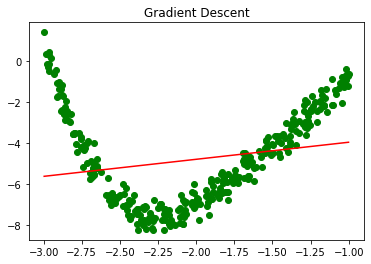

In [8]:
plt.scatter(x, y, c='green')
plt.plot(x, predicted_y, c= "red")
plt.title("Gradient Descent")
plt.show()

## Stochastic Gradient Descent

In [9]:
def SGD(x, y, alpha, epoch, batch_size):
        
    w0 = np.random.randn(1)
    w1 = np.random.randn(1)
    
    for i in range(epoch):
        
        indexes = np.random.randint(0, len(x), batch_size) # random sample
        
        Xs = np.take(x, indexes)
        ys = np.take(y, indexes)
        N = len(Xs)
        
        f = ys - (w1*Xs + w0)
        
        w1 = w1 - alpha * (-2 * Xs.dot(f).sum() / N)
        w0 = w0 - alpha * (-2 * f.sum() / N)        
    
    return w0, w1

In [10]:
w0_sgd, w1_sgd = SGD(x, y, 1e-2, 1000, 20)
print("Final w0 (SGD): ", w0_sgd)
print("Final w1 (SGD): ", w1_sgd)
predicted_y_sgd = w1_sgd * x + w0_sgd

Final w0 (SGD):  [-2.73946696]
Final w1 (SGD):  [0.9352066]


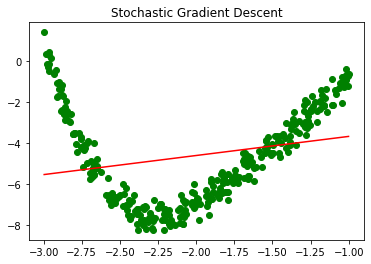

In [11]:
plt.scatter(x, y, c='green')
plt.plot(x, predicted_y_sgd, c= "red")
plt.title("Stochastic Gradient Descent")
plt.show()

# 7.2

**Load data**

In [12]:
second_dataset = np.loadtxt("Datasets/SecondDataset.txt")
print(second_dataset.shape)

(506, 4)


In [13]:
n_train = int(0.9 * len(second_dataset))

In [14]:
train_x = second_dataset[0:n_train, 0:3]
train_y = second_dataset[0:n_train, 3:]
test_x = second_dataset[n_train:, 0:3]
test_y = second_dataset[n_train:, 3:]

print("Shape of train_x:", train_x.shape)
print("Shape of train_y:", train_y.shape)
print("Shape of test_x:", test_x.shape)
print("Shape of test_y:", test_y.shape)

Shape of train_x: (455, 3)
Shape of train_y: (455, 1)
Shape of test_x: (51, 3)
Shape of test_y: (51, 1)


**Defining required functoins**

In [15]:
# define useful functions

def compute_gradient(x, y, weight, m):
  return 1 / m * (x.T.dot((x.dot(weight)) - y))

def normalize(X) :
  X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
  return X

def convert_to_polynomial(input_matrix, degree, m, d):
  X = np.hstack((np.ones((m, 1)), input_matrix))
  result = X
  for j in range(2, degree + 1) :
      result = np.hstack((result, (X[:, 1:] ** j).reshape((m, d))))
  return result

def predict(X, W, degree, m, d):
  return normalize(convert_to_polynomial(X, degree, m, d)).dot(W)

In [16]:
# normalize train_y and test_y
train_y_normalized = ( train_y- np.mean(train_y, axis = 0 ) ) / np.std( train_y, axis = 0 )
test_y_normalized = ( test_y- np.mean(test_y, axis = 0 ) ) / np.std( test_y, axis = 0 )

## 1st order

In [17]:
# from question 5 in homework
# here d = 3
m = len(train_x)
d = 3
X1 = convert_to_polynomial(input_matrix= train_x, degree= 1, m= m, d = d) # y = w0 + w1x (w1 has 3 part for each feature)
X1.shape

(455, 4)

In [18]:
# normalization
X1 = normalize(X1)

In [19]:
lr_1 = 1e-2
W1 = np.random.randn(d + 1, 1)
print("Initial W matrix:")
print(W1.reshape((1, d + 1)))

for iter in range(800):
  W1 = W1 - lr_1 * compute_gradient(X1, train_y_normalized, W1, m)

print("Optimized W:")
print(W1.reshape((1, d + 1)))

Initial W matrix:
[[ 1.90348735 -0.3532034   1.61687287 -0.16500434]]
Optimized W:
[[ 0.00061335 -0.18934946 -0.16067273  0.59326018]]


In [20]:
Y1_pred_train =  predict(X= train_x, W= W1, degree= 1, m= m, d= d)
Y1_pred_test =  predict(X= test_x, W= W1, degree= 1, m= len(test_x), d= d)
print("Train Error:", mean_squared_error(train_y_normalized, Y1_pred_train))
print("Test Error:", mean_squared_error(test_y_normalized, Y1_pred_test))

Train Error: 0.4482933996933058
Test Error: 0.2458276592720989


**Just to check my results are accurate**

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree= 1
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(train_x,train_y_normalized)
pred_tr = polyreg.predict(train_x)
pred_te = polyreg.predict(test_x)
print("Train Error:", mean_squared_error(train_y_normalized, pred_tr))
print("Train Error:", mean_squared_error(test_y_normalized, pred_te))

Train Error: 0.44820869253885326
Train Error: 0.32209032627902606


## 3rd order

In [22]:
# from question 5 in homework
# here d = 3
m = len(train_x)
d = 3
X2 = convert_to_polynomial(input_matrix= train_x, degree= 3, m= m, d = d) # y = w0 + w1x + w2x^2 + w3x^3 (w1, w2, w2 each have 3 part for each feature)
X2.shape

(455, 10)

In [23]:
# normalization
X2 = normalize(X2)

In [24]:
lr_2 = 1e-2
W2 = np.random.randn(3 * d + 1, 1)
print("Initial W matrix:")
print(W2.reshape((1, 3 * d + 1)))

for iter in range(800):
  W2 = W2 - lr_2 * compute_gradient(X2, train_y_normalized, W2, m)

print("Optimized W:")
print(W2.reshape((1, 3 * d + 1)))

Initial W matrix:
[[-0.71186921 -0.0357927  -1.44625198  0.33265716  1.87175275  0.96362456
  -0.02937952 -1.84868279  1.11822599 -0.37952407]]
Optimized W:
[[-2.29380180e-04 -6.12422571e-01 -1.54451476e+00  3.69889519e-01
   1.84114811e+00  6.97901303e-01  2.15859115e-01 -1.45280953e+00
   7.00311012e-01  4.06595473e-02]]


In [25]:
Y2_pred_train =  predict(X= train_x, W= W2, degree= 3, m= m, d= d)
Y2_pred_test =  predict(X= test_x, W= W2, degree= 3, m= len(test_x), d= d)
print("Train Error:", mean_squared_error(train_y_normalized, Y2_pred_train))
print("Test Error:", mean_squared_error(test_y_normalized, Y2_pred_test))

Train Error: 0.4901633659684032
Test Error: 0.5065156812493368


**Just to check my results are accurate**

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree= 3
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(train_x,train_y_normalized)
pred_tr = polyreg.predict(train_x)
pred_te = polyreg.predict(test_x)
print("Train Error:", mean_squared_error(train_y_normalized, pred_tr))
print("Train Error:", mean_squared_error(test_y_normalized, pred_te))

Train Error: 0.2870320596291458
Train Error: 0.27013667809831016


## 3rd order with regularization

In [27]:
def compute_regularization_gradient(x, y, weight, m, lamda):
  return 1 / m * (x.T.dot((x.dot(weight)) - y) + lamda * weight)

In [28]:
# from question 5 in homework
# here d = 3
m = len(train_x)
d = 3
X3 = convert_to_polynomial(input_matrix= train_x, degree= 3, m= m, d = d)
# normalization
X3 = normalize(X3)

In [29]:
lr_3 = 1e-2
lamdas = [np.exp(-40), np.exp(-35), np.exp(-30), np.exp(-25), np.exp(-20), np.exp(-15), np.exp(-10)]
number_of_experiments = 7
train_errors = []
test_errors = []

for i in range(number_of_experiments):
  lamda = lamdas[i]
  W3 = np.random.randn(3 * d + 1, 1)
  for iter in range(800):
    W3 = W3 - lr_2 * compute_regularization_gradient(X3, train_y_normalized, W3, m, lamda)
  print("Optimized W with lambda ", lamda, " is :")
  print(W3.reshape((1, 3 * d + 1)))
  Y3_pred_train =  predict(X= train_x, W= W3, degree= 3, m= m, d= d)
  Y3_pred_test =  predict(X= test_x, W= W3, degree= 3, m= len(test_x), d= d)
  tr_err = mean_squared_error(train_y_normalized, Y3_pred_train)
  te_err = mean_squared_error(test_y_normalized, Y3_pred_test)
  print("Train Error:", tr_err)
  print("Test Error:", te_err)
  train_errors.append(tr_err)
  test_errors.append(te_err)
  print()

Optimized W with lambda  4.248354255291589e-18  is :
[[ 9.24124728e-05 -9.06488421e-01  1.24796504e+00  1.72101321e+00
   1.98011620e+00 -1.20761493e+00 -4.74507678e-01 -1.38525131e+00
  -3.90830436e-02 -5.78233787e-01]]
Train Error: 0.6189306465809183
Test Error: 0.37110596192331413

Optimized W with lambda  6.305116760146989e-16  is :
[[-1.02765698e-04 -3.01369701e-02 -4.06002074e-01 -4.02818697e-01
   8.87730234e-02 -4.44183332e-01  7.52602388e-02 -2.04753635e-01
   6.07863792e-01  9.48472032e-01]]
Train Error: 0.3843845317350998
Test Error: 0.24830742442090928

Optimized W with lambda  9.357622968840175e-14  is :
[[ 7.16197780e-05  2.21571476e-01 -1.25335746e-01 -6.09729532e-02
  -1.26732599e+00 -4.49830638e-01  7.71636278e-01  9.54225785e-01
   3.63894899e-01 -1.06839557e-01]]
Train Error: 0.4376447528867728
Test Error: 0.21694684728052974

Optimized W with lambda  1.3887943864964021e-11  is :
[[-1.48273282e-04 -5.60124487e-01  1.19113632e-01 -3.84411809e-01
   2.72186173e-01 -1.0

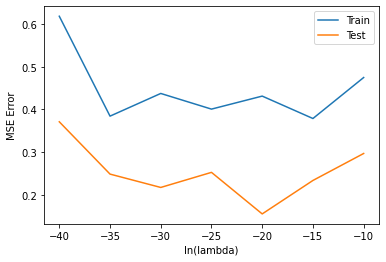

In [30]:
# plotting
ln_lamdas = np.log(lamdas)
plt.plot(ln_lamdas, train_errors, label = "Train")
plt.plot(ln_lamdas, test_errors, label = "Test")
plt.xlabel('ln(lambda)')
plt.ylabel('MSE Error')
plt.legend()
plt.show()

# 7.3

In [31]:
X4 = convert_to_polynomial(input_matrix= train_x, degree= 3, m= m, d = d)
# normalization
X4 = normalize(X4)
X4.shape

(455, 10)

In [32]:
# Find K-Fold indices for cross validaiton
def split(sequence, num):
    avg = len(sequence) / float(num)
    out = []
    last = 0.0

    while last < len(sequence):
        out.append(sequence[int(last):int(last + avg)])
        last += avg

    return out

K = 10    
indices = split(range(len(X4)), K)

In [33]:
lr_3 = 1e-2
lamdas = [np.exp(-40), np.exp(-35), np.exp(-30), np.exp(-25), np.exp(-20), np.exp(-15), np.exp(-10)]
number_of_experiments = 7
train_errors_cv = [0] * K
test_errors_cv = [0] * K
validation_errors_cv = [0] * K

for j in range(K):
  train_indices = list(set(range(len(X4))) - set(indices[j]))
  validation_indices = indices[j] 

  train_x_cv = X4[train_indices,:]
  train_y_cv = train_y_normalized[train_indices,:]
  valid_y_cv = train_y_normalized[validation_indices,:]
  train_errors_cv[j] = []
  test_errors_cv[j] = []
  validation_errors_cv[j] = []

  for i in range(number_of_experiments):
    lamda = lamdas[i]
    W4 = np.random.randn(3 * d + 1, 1)
    for iter in range(800):
      W4 = W4 - lr_2 * compute_regularization_gradient(train_x_cv, train_y_cv, W4, m, lamda)

    Y4_pred_train =  predict(X= train_x[train_indices,:], W= W4, degree= 3, m= m - len(indices[j]), d= d)
    Y4_pred_valid =  predict(X= train_x[validation_indices,:], W= W4, degree= 3, m= len(indices[j]), d= d)
    Y4_pred_test =  predict(X= test_x, W= W4, degree= 3, m= len(test_x), d= d)

    tr_err_cv = mean_squared_error(train_y_cv, Y4_pred_train)
    valid_err_cv = mean_squared_error(valid_y_cv, Y4_pred_valid)
    te_err_cv = mean_squared_error(test_y_normalized, Y4_pred_test)

    train_errors_cv[j].append(tr_err_cv)
    validation_errors_cv[j].append(valid_err_cv)
    test_errors_cv[j].append(te_err_cv)

Fold numebr  1


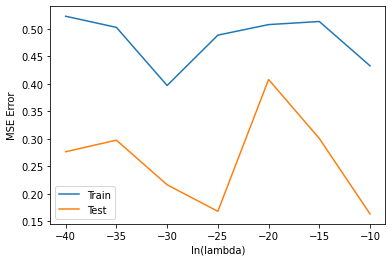


Fold numebr  2


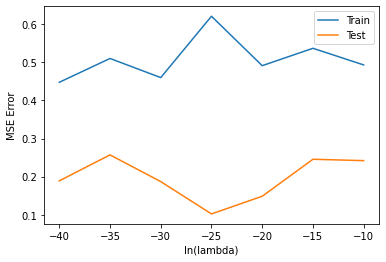


Fold numebr  3


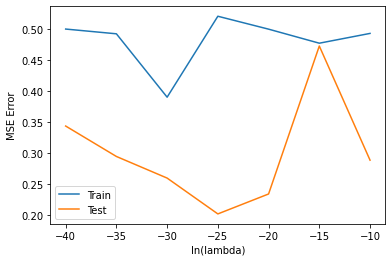


Fold numebr  4


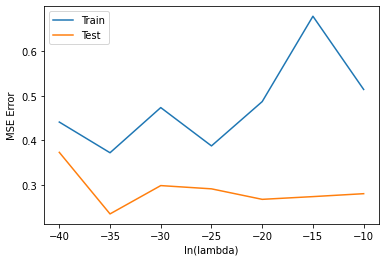


Fold numebr  5


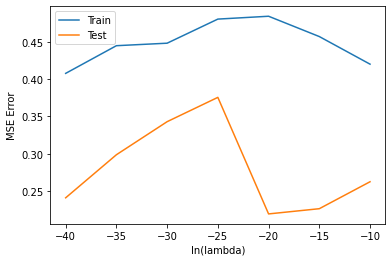


Fold numebr  6


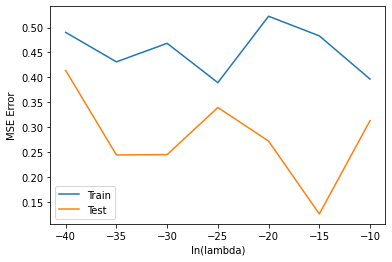


Fold numebr  7


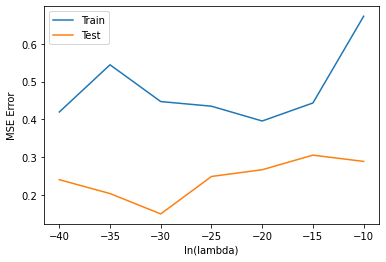


Fold numebr  8


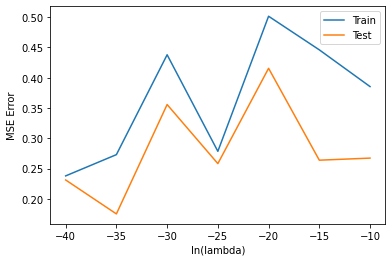


Fold numebr  9


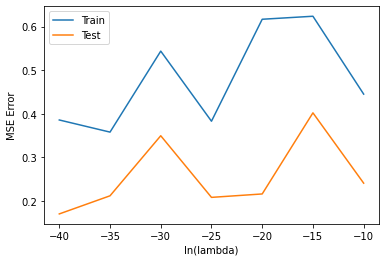


Fold numebr  10


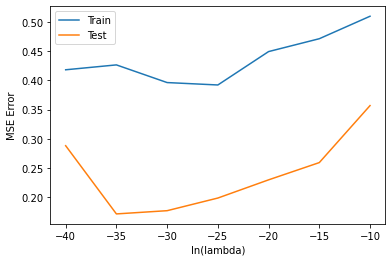

In [34]:
# plotting
ln_lamdas = np.log(lamdas)
for j in range(K):
  print("Fold numebr ", j + 1)
  plt.figure()
  plt.plot(ln_lamdas, train_errors_cv[j], label = "Train")
  plt.plot(ln_lamdas, test_errors_cv[j], label = "Test")
  plt.xlabel('ln(lambda)')
  plt.ylabel('MSE Error')
  plt.legend()
  plt.show()
  print()

In [35]:
# Best lambda
mean_validation_errors = []
sums = [0] * 7
for j in range(7):
  for i in range(K):
    sums[j]+= validation_errors_cv[i][j]

mean_validation_errors = [x / K for x in sums]

for i in range(len(lamdas)):
  print("Mean validation error for lambda = ", lamdas[i], "is: ", mean_validation_errors[i])

Mean validation error for lambda =  4.248354255291589e-18 is:  0.877839088491457
Mean validation error for lambda =  6.305116760146989e-16 is:  0.8692719904465184
Mean validation error for lambda =  9.357622968840175e-14 is:  0.9160044240248231
Mean validation error for lambda =  1.3887943864964021e-11 is:  0.9212409892381255
Mean validation error for lambda =  2.061153622438558e-09 is:  0.92974007136345
Mean validation error for lambda =  3.059023205018258e-07 is:  0.910167923404941
Mean validation error for lambda =  4.5399929762484854e-05 is:  0.9080179200423013


In [36]:
from operator import itemgetter
index = min(enumerate(mean_validation_errors), key=itemgetter(1))[0] 
print("The best lambda is the ",index + 1, "th one. And ln(lambda) = ", ln_lamdas[index])

The best lambda is the  2 th one. And ln(lambda) =  -35.0
